<a href="https://colab.research.google.com/github/sanahashmat/Image-Video-processing/blob/main/ImgLPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

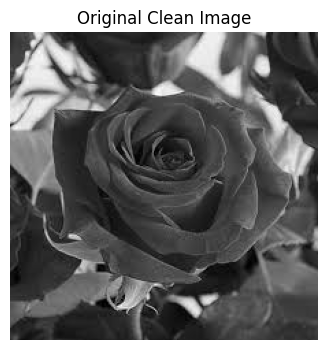

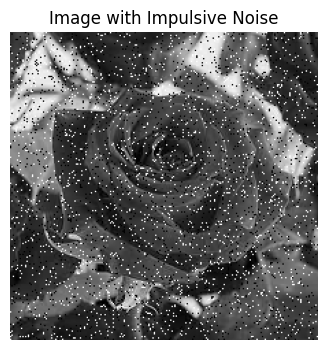

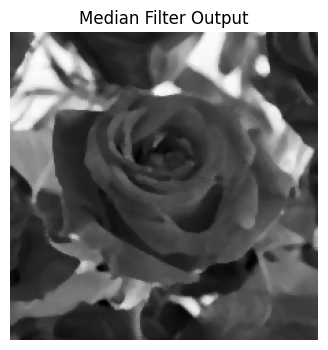

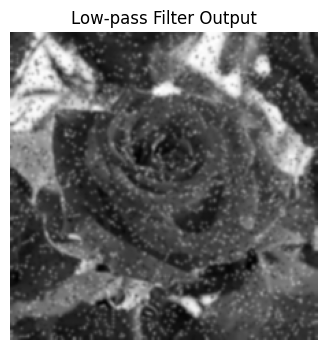

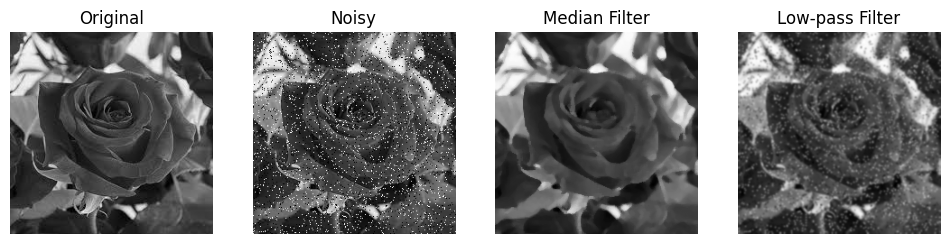

===== PERFORMANCE METRICS =====
PSNR (Median Filter)   : 27.19 dB
PSNR (Low-pass Filter) : 23.82 dB

SSIM (Median Filter)   : 0.8443
SSIM (Low-pass Filter) : 0.6244

===== OBSERVATION =====
1. Median filter effectively removes impulsive noise.
2. Edges are preserved in median filtering.
3. Low-pass filter smooths noise but blurs edges.
4. Median filter shows higher PSNR and SSIM values.
5. Median filter is more suitable for impulsive noise removal.


In [1]:
# ==========================================================
# Impulsive Noise Removal using Median and Low-Pass Filters
# ==========================================================

# 1. Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# ----------------------------------------------------------
# 2. Load clean image (use default image if not uploaded)
# ----------------------------------------------------------
# Upload an image manually or use OpenCV sample
img = cv2.imread('/content/rose flower.jpg', cv2.IMREAD_GRAYSCALE)

# If image not found, create a synthetic image
if img is None:
    img = np.zeros((256,256), dtype=np.uint8)
    cv2.putText(img, "IMAGE", (40,140),
                cv2.FONT_HERSHEY_SIMPLEX,
                2, 255, 5)

# Display original image
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Clean Image")
plt.axis('off')
plt.show()

# ----------------------------------------------------------
# 3. Add Impulsive (Salt & Pepper) Noise
# ----------------------------------------------------------
noisy_img = random_noise(img, mode='s&p', amount=0.08)
noisy_img = (noisy_img * 255).astype(np.uint8)

plt.figure(figsize=(4,4))
plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Impulsive Noise")
plt.axis('off')
plt.show()

# ----------------------------------------------------------
# 4. Median Filter for Noise Removal
# ----------------------------------------------------------
median_filtered = cv2.medianBlur(noisy_img, 5)

plt.figure(figsize=(4,4))
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter Output")
plt.axis('off')
plt.show()

# ----------------------------------------------------------
# 5. Low-pass (Gaussian) Filter for Noise Removal
# ----------------------------------------------------------
lowpass_filtered = cv2.GaussianBlur(noisy_img, (5,5), 1)

plt.figure(figsize=(4,4))
plt.imshow(lowpass_filtered, cmap='gray')
plt.title("Low-pass Filter Output")
plt.axis('off')
plt.show()

# ----------------------------------------------------------
# 6. Visual Comparison
# ----------------------------------------------------------
plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(lowpass_filtered, cmap='gray')
plt.title("Low-pass Filter")
plt.axis('off')

plt.show()

# ----------------------------------------------------------
# 7. Quantitative Performance Evaluation
# ----------------------------------------------------------
psnr_median = psnr(img, median_filtered)
psnr_lowpass = psnr(img, lowpass_filtered)

ssim_median = ssim(img, median_filtered)
ssim_lowpass = ssim(img, lowpass_filtered)

print("===== PERFORMANCE METRICS =====")
print(f"PSNR (Median Filter)   : {psnr_median:.2f} dB")
print(f"PSNR (Low-pass Filter) : {psnr_lowpass:.2f} dB\n")

print(f"SSIM (Median Filter)   : {ssim_median:.4f}")
print(f"SSIM (Low-pass Filter) : {ssim_lowpass:.4f}")

# ----------------------------------------------------------
# 8. Performance Commentary
# ----------------------------------------------------------
print("\n===== OBSERVATION =====")
print("1. Median filter effectively removes impulsive noise.")
print("2. Edges are preserved in median filtering.")
print("3. Low-pass filter smooths noise but blurs edges.")
print("4. Median filter shows higher PSNR and SSIM values.")
print("5. Median filter is more suitable for impulsive noise removal.")
